# 5: Korpusanalyse mit scikit-learn

- Train-Test-Splits
- Cluster Analysis
- Preprocessing (Scaling)
- CountVectorizer, TfidfVectorizer 
- Document Classification
- Topic Modeling (LatentDirichletAllocation) 


--- 
## Package Info

### scikit-learn (Machine Learning with Python)

https://scikit-learn.org/

- Python Library with many **Machine Learning Algorithms** for:
  - **Supervised Learning (Classification, Regression)**
  - **Unsupervised Learning (Clustering, etc.)**
- also provides data sets for classification tasks (e.g. '20 Newsgroup text dataset')



---
## Corpus Analysis


#### Basic Analysis (Descriptive Statistics):
- **Frequency Lists**
- **Collocations**
- **Concordance**


- Libraries:
    - numpy: https://numpy.org/doc/stable/reference/routines.statistics.html
    - pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html


#### *Corpus-based* Analysis  (Inferential Statistics):
- Hypothesis Testing on Corpus Data
- see https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c#2258


- Libraries:
    - scipy (hyothesis testing): https://docs.scipy.org/doc/scipy/reference/stats.html
    - scikit-learn (classification & regression): https://scikit-learn.org/stable/

#### *Corpus-driven* Analysis  (Exploratory Statistics):
- Finding Patterns of Language Use 
- *data-driven* (finding hypothesis)
- e.g. Clustering, Topic Modeling with LDA (Latent Dirichlet Allocation)


- Library: 
    - scikit-learn: https://scikit-learn.org/stable/



---
## Loading Packages

In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline



## 1. Machine Learning for Text Analysis

- ***Machine learning algorithms build models based on patterns in data***

> Machine Learning, bzw. maschinelles Lernen im Deutschen, ist ein Teilbereich der künstlichen Intelligenz. Auf Grundlage möglichst vieler (Text-)Daten erkennt und erlernt ein Computer die häufig sehr komplexen Muster und Gesetzmäßigkeiten bestimmter Phänomene. Daraufhin können die aus den Daten gewonnen Erkenntnisse verallgemeinert werden und für neue Problemlösungen oder für die Analyse von bisher unbekannten Daten verwendet werden.<br>https://fortext.net/ueber-fortext/glossar/machine-learning




### 1.1 Models:

- **supervised** (Classification & Regression) vs. **unsupervised models** (Clustering, Topic Modeling, etc.)
- statistical models vs neural networks models: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

- models in scikit learn: https://scikit-learn.org/stable/user_guide.html


- ***Clustering models: important method in exploratory data analysis (discovering patterns in data)***
- ***Classification models: can also be used for data analysis (inspecting model), in addition to predicting (e.g. in automated annotation/labeling task)***


### 1.2 Data Representations:

- compare **text objects (documents)** based on certain characteristics
- typically represented as a **feature set**
- feature extraction from document collection results in **document-feature-matrix** (list of list of feature-values)





In [4]:
np.random.seed(42) #set seed for reproducibility
df = pd.DataFrame(np.random.randn(5, 4), 
                  index=["Document_1","Document_2","Document_3","Document_4","Document_5",], 
                  columns=["Feature_A","Feature_B","Feature_C","Feature_D"])
df

,Feature_A,Feature_B,Feature_C,Feature_D
Document_1,0.496714,-0.138264,0.647689,1.523030
Document_2,-0.234153,-0.234137,1.579213,0.767435
Document_3,-0.469474,0.542560,-0.463418,-0.465730
Document_4,0.241962,-1.913280,-1.724918,-0.562288
Document_5,-1.012831,0.314247,-0.908024,-1.412304


In [5]:
# list view of values of first document
df.values.tolist()[0:1]

[[0.4967141530112327,
  -0.13826430117118466,
  0.6476885381006925,
  1.5230298564080254]]

---
### 1.3. Example: Linear Regression Model (*Supervised Learning*)

- Regression analysis models the *relationship between **two numerical variables***
- Linear Regression Model: linear equation, learned from training data (<code>y = ax + b</code>)
- Model allows prediction of **response variable (<code>y</code>)** for new objects (based on  **predictor variable <code>x</code>**, also: explanatory/independent variable)


- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- https://www.tutorialspoint.com/r/r_linear_regression.htm



In [6]:
#Select 2 variables
X = df[['Feature_A']]
y = df[['Feature_D']]

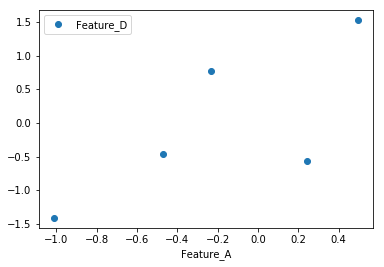

In [7]:
df.plot(x='Feature_A',y='Feature_D',style='o')

In [8]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Predict the set results
y_pred = regr.predict(X)
y_pred

array([[ 0.9780306 ],
       [-0.08617145],
       [-0.42881782],
       [ 0.60709132],
       [-1.21998904]])

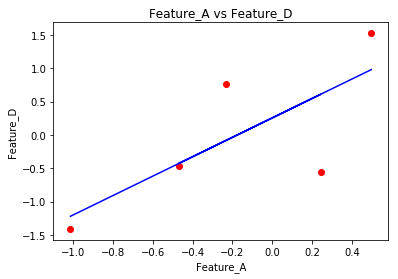

In [10]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regr.predict(X), color = 'blue')
plt.title('Feature_A vs Feature_D')
plt.xlabel('Feature_A')
plt.ylabel('Feature_D')
plt.show()

---
### 1.4. Classification: *Supervised Learning*

- ***categorical response variable*** (class label, e.g. genre label)
- classifier model assigns class label to input (problem instance)
- model learns mapping from data representation to (apriori given) classes based on patterns in training data

##### Mapping: **object &rarr; class**



In [11]:
# add categorical response variable = output label
class_labels = pd.Categorical(["neutral", "neutral", "positive", "negative", "neutral"])
df["Class_Label"] = class_labels
df

,Feature_A,Feature_B,Feature_C,Feature_D,Class_Label
Document_1,0.496714,-0.138264,0.647689,1.523030,neutral
Document_2,-0.234153,-0.234137,1.579213,0.767435,neutral
Document_3,-0.469474,0.542560,-0.463418,-0.465730,positive
Document_4,0.241962,-1.913280,-1.724918,-0.562288,negative
Document_5,-1.012831,0.314247,-0.908024,-1.412304,neutral


<br>
<img src="https://www.nltk.org/images/supervised-classification.png" width=38%>

https://www.nltk.org/book/ch06.html#fig-supervised-classification
>Supervised Classification. (a) During training, a feature extractor is used to convert each input value to a feature set. These feature sets, which capture the basic information about each input that should be used to classify it, are discussed in the next section. Pairs of feature sets and labels are fed into the machine learning algorithm to generate a model. (b) During prediction, the same feature extractor is used to convert unseen inputs to feature sets. These feature sets are then fed into the model, which generates predicted labels.

### 1.5. Train-Test-Splits of Dataset

- split shuffled data 

#### A: Training

- *train* model on **training set** with given classes


#### B: Testing / Prediction
- use model to *predict* class of new data with unknown class
- evaluate accuracy etc. of predictions based on correct classes in **test set** ("gold standard")


#### C: Error Analysis for Feature Selection

- additional **dev test set** for improving accuracy of classification by adding/selecting features (which features should be taken into account by the classification algorithm)


<img src="https://www.nltk.org/images/corpus-org.png" width=33% /> 

https://www.nltk.org/book/ch06.html#fig-corpus-org 
>Organization of corpus data for training supervised classifiers. The corpus data is divided into two sets: the development set, and the test set. The development set is often further subdivided into a training set and a dev-test set.

In [12]:
# mit scikit-learn:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42) #random_state is seed value
print(len(train),len(test))

4 1


In [13]:
test

,Feature_A,Feature_B,Feature_C,Feature_D,Class_Label
Document_2,-0.234153,-0.234137,1.579213,0.767435,neutral


In [14]:
# mit pandas:
train = df.sample(frac=0.8,random_state=42) #random_state is seed value
test = df.drop(train.index)
print(len(train),len(test))

4 1


#### Train-Test-Dev-Split:

In [15]:
# mit numpy und pandas: 60%, 20%, 20% split
train, validate, test = np.split(df.sample(frac=1,random_state=42), [int(.6*len(df)), int(.8*len(df))]) 
print(len(train),len(validate),len(test))

3 1 1


---
### 1.6. Clustering: *Unsupervised Learning*

https://scikit-learn.org/stable/modules/clustering.html

- Learning algorithms that discover patterns in data (grouping) 
- Cluster model learns clusters (classes) in feature sets (cluster = grouping of similar data points / objects)
- *no classes given!* (= **unsupervised learning**)
- Evaluation based on internal as well as external ***cluster quality measures*** (see below)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png" width="44%">
https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png

---

---


## 2. Cluster Analysis Example (Stylometry)

#####  Clustering texts based on quantitative characteristics


>In der digitalen Stilometrie werden Texte oder Textpassagen auf Grundlage statistischer Verteilungen (i. d. R. der häufigsten Wörter) stilistisch miteinander verglichen. So lässt sich beispielsweise die stilistische Entwicklung oder Differenzierung eines literarischen Textes, eines Œuvres, oder gar einer ganzen Epoche quantitativ nachvollziehen. Insbesondere werden stilometrische Methoden bei Autorschaftsattributionen, Genreklassifikationen, Epochendifferenzierungen oder auch in der forensischen Linguistik eingesetzt.<br>https://fortext.net/routinen/methoden/stilometrie

#### Load Brown Corpus (with Genre Classes)

In [16]:
import nltk
import re
from nltk.corpus import brown
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [17]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

#### Select 2 genres for later comparison:

In [18]:
len(brown.words(categories='romance'))

70022

In [19]:
brown.fileids(categories='romance')[0:3]

['cp01', 'cp02', 'cp03']

In [20]:
len(brown.fileids(categories='romance'))

29

In [21]:
brown.sents('cp02')

[['People', 'came', 'in', 'and', 'out', 'all', 'evening', 'to', 'see', 'the', 'baby', 'and', 'hold', 'it', '.'], ['The', 'room', 'filled', 'with', 'smoke', ',', 'and', "Maggie's", 'head', 'throbbed', 'with', 'excitement', 'and', 'fatigue', ',', 'but', 'Stuart', 'had', 'such', 'a', 'happy', ',', 'earnest', 'look', 'of', 'proud', 'possession', 'on', 'his', 'face', 'that', 'Maggie', "couldn't", 'bear', 'to', 'do', 'anything', 'to', 'quench', 'it', '.'], ...]

---

In [22]:
len(brown.words(categories='government'))

70117

In [23]:
brown.fileids(categories='government')[0:3]

['ch01', 'ch02', 'ch03']

In [24]:
len(brown.fileids(categories='government'))

30

In [25]:
brown.sents('ch01')

[['The', 'Office', 'of', 'Business', 'Economics', '(', 'OBE', ')', 'of', 'the', 'U.S.', 'Department', 'of', 'Commerce', 'provides', 'basic', 'measures', 'of', 'the', 'national', 'economy', 'and', 'current', 'analysis', 'of', 'short-run', 'changes', 'in', 'the', 'economic', 'situation', 'and', 'business', 'outlook', '.'], ['It', 'develops', 'and', 'analyzes', 'the', 'national', 'income', ',', 'balance', 'of', 'international', 'payments', ',', 'and', 'many', 'other', 'business', 'indicators', '.'], ...]

### 2.1 Feature Extraction


In [26]:
def style_features(category):
    style_features={}
    for x in brown.fileids(categories=category):
        
        #average sentence length:
        av_sent_length = len(brown.words(x)) / len(brown.sents(x)) 
 
        #average word length:
        word_char_list = [list(x) for x in brown.words(x)] 
        char_list = [char for chars in word_char_list for char in chars]
        av_word_length = len(char_list) / len(brown.words(x))

        #select features:
        style_features[x] = [av_sent_length, av_word_length]

    return style_features


#### Feature Extraction for Government Genre:

In [27]:
gov_features = style_features('government')

In [28]:
gov_feat = [x for x in gov_features.values()]
gov_feat[0:5]

[[16.21476510067114, 4.962334437086093],
 [20.344827586206897, 4.827118644067797],
 [26.59036144578313, 4.285455369279565],
 [18.829268292682926, 4.8713298791019],
 [26.843373493975903, 4.6014362657091565]]

#### Feature Extraction for Romance Genre:

In [29]:
rom_features = style_features('romance')

In [30]:
rom_feat = [x for x in rom_features.values()]
rom_feat[0:5]

[[17.801526717557252, 3.949399656946827],
 [23.6734693877551, 3.945258620689655],
 [16.589041095890412, 3.741535920726672],
 [19.142857142857142, 3.9371563236449334],
 [17.908396946564885, 3.998294970161978]]

### 2.2 Prepare Data

#### Combine Romance + Government Feature Sets:

In [31]:
feat = gov_feat + rom_feat
len(feat)

59

#### Create list of class labels for comparison & evaluation:

In [32]:
genre_labels = ['gov' for x in gov_features] + ['rom' for x in rom_features]
print(genre_labels)

['gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'gov', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom', 'rom']


In [33]:
genre_labels_num = [0 for x in gov_features] + [1 for x in rom_features]
print(genre_labels_num)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Scatterplot of data with genre classes given in corpus:

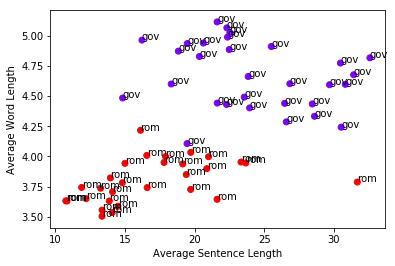

In [34]:
fig, ax = plt.subplots()
ax.scatter([x[0] for x in feat],[x[1] for x in feat], c=genre_labels_num, cmap='rainbow')
        
for i, txt in enumerate(genre_labels):
    ax.annotate(txt, ([x[0] for x in feat][i], [x[1] for x in feat][i]))

plt.xlabel('Average Sentence Length')
plt.ylabel('Average Word Length')

### 2.3 Agglomerative Hierarchical Clustering

##### Clustering algorithm that builds a buttom-up hierarchy of clusters

- Cluster = grouping of data points in feature space
- Grouping based on distances in feature space (= dissimiliarity)


#### Parameter:
1. **Distance measure** (e.g. [Euclidean Distance](https://en.wikipedia.org/wiki/Euclidean_distance)), specifies how to measure the distance between data points
2. **Linkage type** (e.g. Complete, Ward), specifies how to measure the distance between clusters (how to merge clusters)



#### Linkage Types in Agglomerativ Hierarchical Clustering
>Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. In this regard, single linkage is the worst strategy, and Ward gives the most regular sizes. However, the affinity (or distance used in clustering) cannot be varied with Ward, thus for non Euclidean metrics, average linkage is a good alternative. Single linkage, while not robust to noisy data, can be computed very efficiently and can therefore be useful to provide hierarchical clustering of larger datasets. Single linkage can also perform well on non-globular data.<br>
https://scikit-learn.org/stable/modules/clustering.html 

<img width=40% src="https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png"> https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png

In [35]:
from sklearn.cluster import AgglomerativeClustering

X = np.array(feat)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
cluster.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

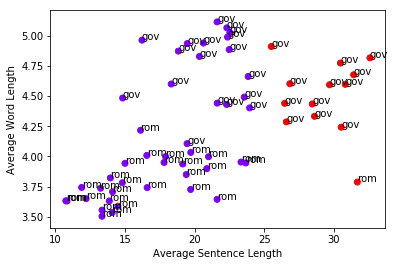

In [37]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
        
for i, txt in enumerate(genre_labels):
    ax.annotate(txt, (X[:,0][i], X[:,1][i]))
    
plt.xlabel('Average Sentence Length')
plt.ylabel('Average Word Length')

#### Evaluate clustering result (unscaled features):

In [38]:
#https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(genre_labels, cluster.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(genre_labels, cluster.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(genre_labels, cluster.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(genre_labels, cluster.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cluster.labels_, sample_size=1000))

Homogeneity: 0.161
Completeness: 0.211
V-measure: 0.183
Adjusted Rand-Index: 0.116
Silhouette Coefficient: 0.568


### 2.4 Feature Scaling (using scikit-learn's Preprocessing Library)

##### Scaling = normalize range of variables

In [39]:
X = np.array(feat)
X[0:5]

array([[16.2147651 ,  4.96233444],
       [20.34482759,  4.82711864],
       [26.59036145,  4.28545537],
       [18.82926829,  4.87132988],
       [26.84337349,  4.60143627]])

In [40]:
X_scaled = sklearn.preprocessing.scale(X)
X_scaled[0:5]

array([[-0.74713711,  1.48169518],
       [-0.03892086,  1.20502815],
       [ 1.0320529 ,  0.09672296],
       [-0.29880645,  1.29548941],
       [ 1.07543899,  0.74325612]])

In [41]:
#Clustering with scaled data:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

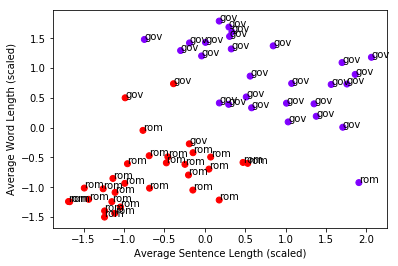

In [42]:
#scaled axes
fig, ax = plt.subplots()
ax.scatter(X_scaled[:,0],X_scaled[:,1], c=cluster.labels_, cmap='rainbow')
        
for i, txt in enumerate(genre_labels):
    ax.annotate(txt, (X_scaled[:,0][i], X_scaled[:,1][i]))
    
plt.xlabel('Average Sentence Length (scaled)')
plt.ylabel('Average Word Length (scaled)')

#### Evaluate clustering result (scaled features):

In [43]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(genre_labels, cluster.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(genre_labels, cluster.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(genre_labels, cluster.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(genre_labels, cluster.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cluster.labels_, sample_size=1000))

Homogeneity: 0.653
Completeness: 0.655
V-measure: 0.654
Adjusted Rand-Index: 0.743
Silhouette Coefficient: 0.391


---
## 3. Keyword-based Document Classification

#### tf-idf = bag-of-words model with term weights 

- **bag-of-words model:** simple text representation based on counts of words (vocabulary)
- **tf-idf:** term frequency – inverse document frequency
  - models the importance of each word (vocabulary) in a text collection (training data) based on its frequencies in text and collection (~keywords)


- results in **high-dimensional feature space** (feature set = vocabulary of documents)

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### 3.1 Introduction example for tf-idf-based Keyword Extraction

> In order to feed predictive or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis. This can be achieved with the utilities of the sklearn.feature_extraction.text as demonstrated in the following example that extract TF-IDF vectors of unigram tokens [...]<br> https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html#converting-text-to-vectors



#### TfidfVectorizer

In [47]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus) #X = vectors
print(X.shape)

(4, 9)


In [48]:
terms = vectorizer.get_feature_names()
terms

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [49]:
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [50]:
X.todense()

matrix([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524],
        [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
         0.53864762, 0.28108867, 0.        , 0.28108867],
        [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
         0.        , 0.26710379, 0.51184851, 0.26710379],
        [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
         0.        , 0.38408524, 0.        , 0.38408524]])

In [51]:
def keywords(i):
    scores = X[i].toarray().flatten().tolist()
    data = list(zip(terms,scores))
    sorted_data = sorted(data,key=lambda x: x[1],reverse=True)
    sorted_keywords = [w[0] for w in sorted_data[:2]]
    return sorted_keywords

In [52]:
#Keywords first document:
keywords(0)

['first', 'document']

In [53]:
#Keywords second document:
keywords(1)

['document', 'second']

In [54]:
#Keywords third document:
keywords(2)

['and', 'one']

### 3.2 Prepare Training Data

- Using the training corpora of scikit-learn:

In [55]:
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
from sklearn.datasets import fetch_20newsgroups

In [56]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [57]:
len(twenty_train.data)
len(twenty_train.filenames)

2257

In [58]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [59]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [60]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

### 3.3 Feature Extraction (Keywords)

#### CountVectorizer + TfidfTransformer
(alternativ zu TfidfVectorizer)

In [61]:
# Extracting features from text files

# Tokenizing text with scikit-learn
# extracting count-based features:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [63]:
# from occurrence to relative frequency of word within document: tf
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [64]:
#tf weighted by inverse document frequency (share of documents that contain the word): tfidf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

> The extracted TF-IDF vectors are very sparse: 

an average of 162 non-zero components by sample in a more than 35000-dimensional space (less than .5% non-zero features; 162/35788) 

- cf. https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html#converting-text-to-vectors

In [65]:
#vectors.nnz / float(vectors.shape[0])
X_train_tfidf.nnz / float(X_train_tfidf.shape[0])

162.1116526362428

In [66]:
#Get the count of explicitly-stored values (nonzeros)
X_train_tfidf.nnz

365886

### 3.4 Train and Test Classifier

In [67]:
#import classifier
from sklearn.naive_bayes import MultinomialNB

In [68]:
#Training a classifier
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [69]:
#predict
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


#### Build Pipeline and Evaluate Classifier Model:

In [70]:
#Building a pipeline with MultinomialNB-classifier:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
    ])

In [71]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [72]:
#Evaluation of the performance on the test set
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

---
## 4. Topic Modeling with LDA (Latent Dirichlet Allocation)

> Das Topic Modeling ist ein statistisches, auf Wahrscheinlichkeitsrechnung basierendes, Verfahren zur thematischen Exploration größerer Textsammlungen. Das Verfahren erzeugt „Topics“ zur Abbildung häufig gemeinsam vorkommender Wörter in einem Text. Für die Durchführung können verschiedene Algorithmen und Modelle wie das LDA verwendet werden.<br>https://fortext.net/ueber-fortext/glossar/topic-modeling


---
- Unsupervised classification method, similar to clustering, cf. https://scikit-learn.org/stable/unsupervised_learning.html
- Discover topics in text collection by extracting set of frequently occuring words
 
---




#### LDA

> LDA steht für Latent Dirichlet Allocation und ist ein generatives, statistisches Wahrscheinlichkeitsmodell, welches zum Topic Modeling angewendet werden kann. Bei der LDA werden auf Grundlage eines Wahrscheinlichkeitsmodells Wortgruppen aus Textdokumenten erstellt. Dabei wird jedes Dokument als eine Mischung von verborgenen Themen betrachtet und jedes Wort einem Thema zugeordnet. Wortreihenfolgen und Satzzusammenhänge spielen dabei keine Rolle.<br>https://fortext.net/ueber-fortext/glossar/lda


- https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation

- https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730



In [69]:
#https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [71]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [72]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)

In [73]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
people gun armenian armenians war turkish states israel said children
Topic 1:
government people law mr use president don think right public
Topic 2:
space program output entry data nasa use science research build
Topic 3:
key car chip used keys bike use bit clipper number
Topic 4:
edu file com available mail ftp files information image send
Topic 5:
god people does jesus say think believe don know just
Topic 6:
windows use drive thanks does problem know card like using
Topic 7:
ax max b8f g9v a86 pl 145 1d9 0t 34u
Topic 8:
just don like think know good time ve people said
Topic 9:
10 00 25 15 12 20 11 14 17 16


---
# &Uuml;bungsaufgaben 5



## Aufgabe 1 (Bigramme mit pandas und scikit-learn)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und dem CountVectorizer von scikit-learn:

In [ ]:
#Beispiel CountVectorizer:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words='english', ngram_range=(2,2))

## Aufgabe 2 (Topic Modeling mit scikit-learn und pandas)

Lesen Sie den Wahlverwandschaften-Text **absatzweise** ein und speichern die Absätze in einem pandas-Dataframe.

### Aufgabe 2a: Grid Search  

Verwenden Sie die Grid-Search-Funktionalität von scikit-learn (https://scikit-learn.org/stable/modules/grid_search.html#grid-search) 
um für die Absätze des Textes 
die optimale Topic-Anzahl 
über LDA (`LatentDirichletAllocation`)
herauszufinden. 

- Wenden Sie den `TfidfVectorizer` auf die Absatzsammlung an (`X`).
- Verwenden Sie untenstehenden Code, um für verschiedene Werte des `n_components`-Parameters (Topic-Anzahl) den `best_estimator_` zu berechnen.
- Verwenden Sie anschließend die `display_topics`-Funktion von oben (Thema 4), um die Top-Keywords für das beste Modell auszugeben.



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(X)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(X))

### Aufgabe 2b: Dominante Topics

Verwenden Sie untenstehenden Code (vgl. https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#14howtoseethedominanttopicineachdocument), 
um die Dokument-Topic-Matrix in einem Dataframe abzuspeichern 
und das dominante Topic für jedes Dokument (hier: Absatz) zu bestimmen.

In [ ]:
import numpy as np

# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

### Aufgabe 2c: Clustering der Topics

Verwenden Sie den KMeans-Algorithmus, 
um ähnliche Themen zu clustern
und das Ergebnis zu plotten.

Sie können sich dabei an untenstehendem Code orientieren (vgl. https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#20howtoclusterdocumentsthatsharesimilartopicsandplot).


In [ ]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=best_lda_model.n_components, random_state=0).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

In [ ]:
# Plot
import matplotlib.pyplot as plt
#import pandas as pd
%matplotlib inline

plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

# Aufgabe 3 (Dokumentenklassifikation mit scikit-learn)


### Aufgabe 3a: SVM-Klassifikator-Pipeline

Trainieren und testen Sie - analog zu Thema 3 der Vorlesung einer tfidf-Keyword-basierten Klassifikation mit Naive Bayes Modell - einen SVM-Klassifikator mit dem `20newsgroups`-Korpus von scikit-learn in einer Pipeline.

In [ ]:
#import classifier
from sklearn import svm

In [ ]:
#import data
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### Aufgabe 3b: Prediction

Verwenden Sie das trainierte Klassifikator-Modell anschließend für die Vorhersage der Genre-Klassen neuer Texte/Sätze.